In [54]:
from PIL import Image
# from PIL.ExifTags impor
import numpy as np
import matplotlib.colorbar as colorbar
import matplotlib.pyplot as plt
import nanofilm
from nanofilm.ndimage import imread
import matplotlib.animation as animation
import os
import re


In [11]:
imagename = r"C:\Users\lb958\Data\2022_12_06_Cu_in_air_run_01\maps\Thickness_maps\Run_02\Cu_tile_100C_air_0_min_003.png"
# image = Image.open(imagename)

[[3.5 3.6 3.6 ... 3.6 3.5 4.9]
 [3.5 3.5 3.4 ... 3.3 3.3 4.8]
 [3.4 3.3 3.4 ... 3.4 3.5 4.8]
 ...
 [3.3 3.6 3.9 ... 4.9 5.  7.6]
 [3.3 3.9 4.4 ... 5.3 4.7 7.5]
 [0.  0.  0.  ... 0.  0.  6.9]]


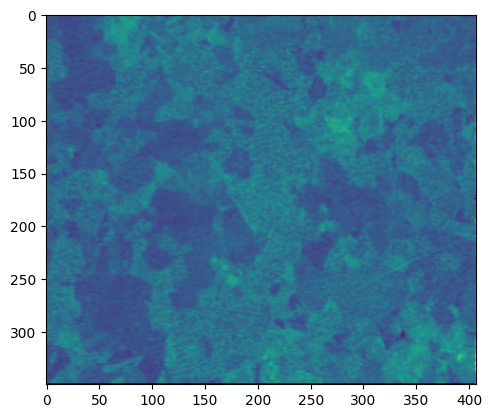

In [12]:
image_array = imread(imagename)
print(image_array)
plt.imshow(image_array)

In [13]:
class ImageData():
    """
    This is a class which utilises the image data exported by a 
    Accurion DataStudio fit of ellipsometry data in a more 
    convenient format
    """
    def __init__(self,image_path : str,time : int):
        """
        This is the constructer of the ImageData object

        Args:
            image_path (str): a path to the PNG image data given by a
            fit to ellipsometry data
            min (float): the minimum thickness value measured
            max (float): the maximum thickness value measured
            time (int): the time into the measurement this image was taken
            e.g. if the image was taken after 30 mins of measurement make this
            30 NOTE: this may be changed in the future to work with seconds 
            rather than minutes if required
        """
        self.image_path = image_path
        self.min = min
        self.max = max
        self.time = time
        # temp_image = Image.open(image_path)
        self.array = imread(image_path) # A NumPy array of the data PNG
        # temp_image.close() # if I don't close it again it will never let me construct another of these objects
        # below uses the provided min and max values for thickness and scales the image array to these values
        #self.real_array = self.raw_array*(self.max/np.amax(self.raw_array))

    def plot(self,title : str = ""):
        """
        Plots a basic thickness map of the data
        Args:
            title (str, optional): Plot title. Defaults to "".
        """
        fig, ax = plt.subplots()
        pos = ax.imshow(self.array,cmap='afmhot')
        fig.colorbar(pos)
        if title == "":
            title = "Thickness plot after time = {} units".format(self.time)
        ax.set_title(title)

    def return_image(self, ax):
        """
        This is for when plotting an animated graph we need to return an
        image object of the type im = ax.imshow() from matplotlib
        Args:
            ax (ax): This is a matplotlib.axes object, as returned when doing
            fig, ax = plt.subplots()
        """
        im = ax.imshow(self.array,animated = True)
        return im

In [14]:
image1 = ImageData(imagename,0)
thickness_0min = image1.array


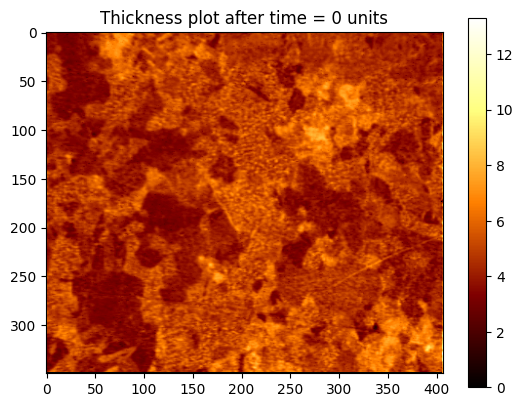

In [15]:
image1.plot()

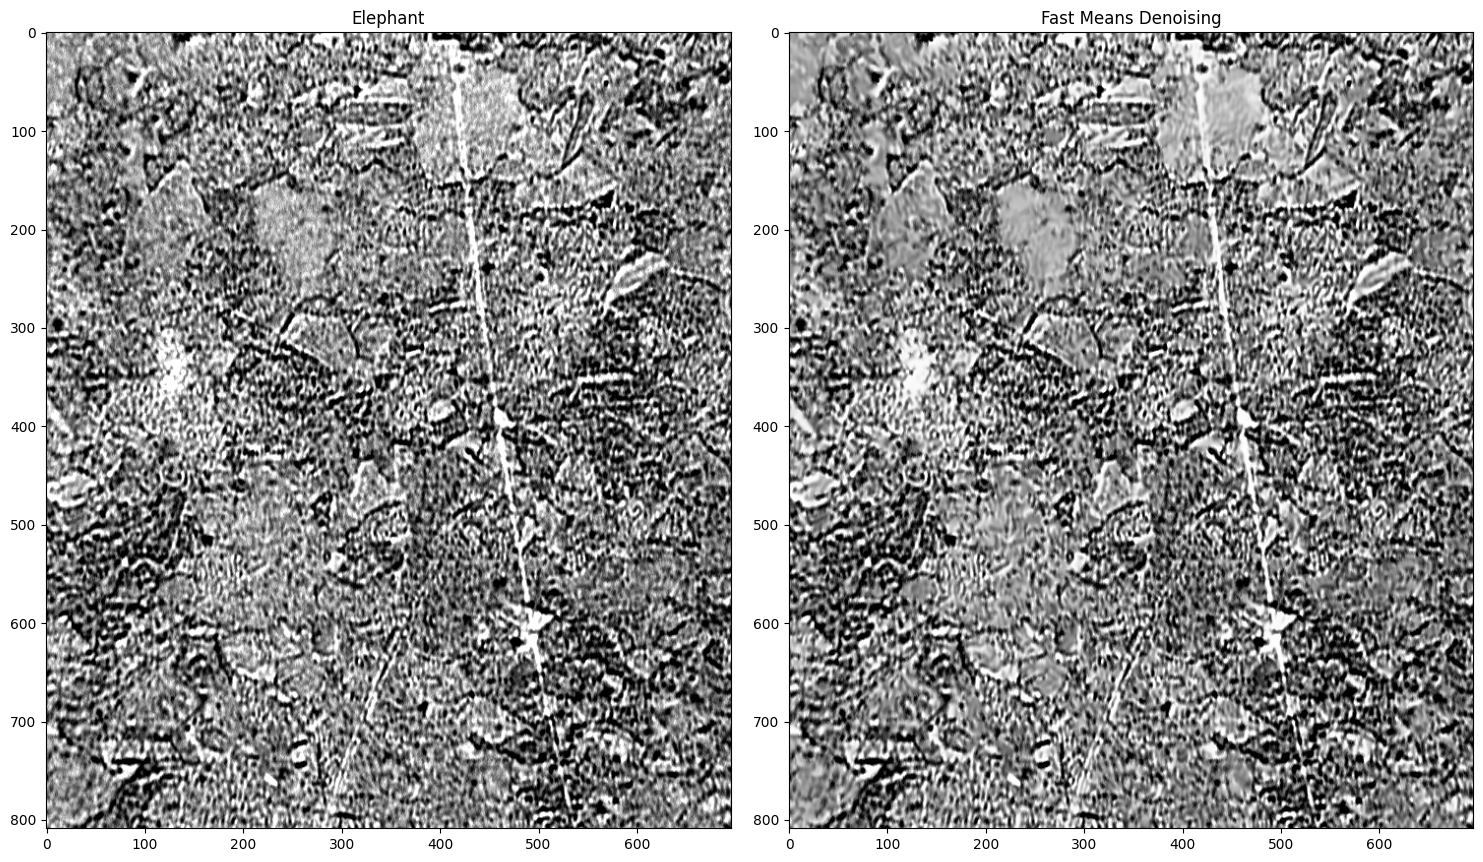

In [16]:
import cv2

image_noisy = r"C:\Users\lb958\Data\2022_12_06_Cu_in_air_run_01\images\Cu_Tile_after_reduction_20221206-120537.png"
image_cv = cv2.imread(image_noisy)
dst = cv2.fastNlMeansDenoisingColored(image_cv, None, 11, 6, 7, 21)
cv2.imwrite(r"C:\Users\lb958\Data\2022_12_06_Cu_in_air_run_01\images\Cu_Tile_after_reduction_20221206-120537_denoised.png",dst)
row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
axs[0].set_title('Elephant')
axs[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
axs[1].set_title('Fast Means Denoising')
plt.show()

In [17]:
def relative_growth_rate(image_before : ImageData, image_after : ImageData):
    """
    Plot an image of growth rates for different pixels
    Args:
        image1 (ImageData): One object of ImageData at a given time 
        image2 (ImageData): Object of ImageData at a later time
    """
    thickness_change = image_after.array - image_before.array
    fig, ax = plt.subplots()
    pos = ax.imshow(thickness_change)
    fig.colorbar(pos)
    

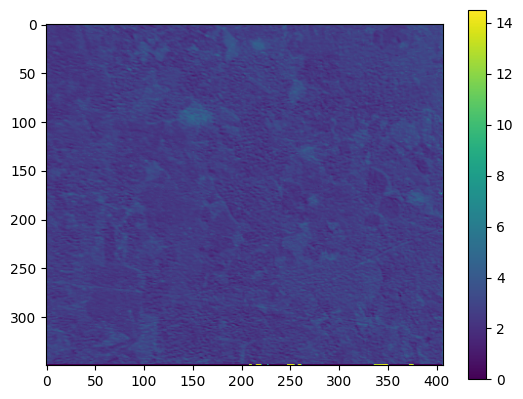

In [18]:
image_0min_path = r"C:\Users\lb958\Data\2022_12_06_Cu_in_air_run_01\maps\Thickness_maps\Run_02\Cu_tile_100C_air_0_min_003.png"
image_30min_path = r"C:\Users\lb958\Data\2022_12_06_Cu_in_air_run_01\maps\Thickness_maps\Run_02\Cu_tile_100C_air_30_min_003.png"
image_60min_path = r"C:\Users\lb958\Data\2022_12_06_Cu_in_air_run_01\maps\Thickness_maps\Run_02\Cu_tile_100C_air_60_min_003.png"
image_90min_path = r"C:\Users\lb958\Data\2022_12_06_Cu_in_air_run_01\maps\Thickness_maps\Run_02\Cu_tile_100C_air_90_min_003.png"
image_150min_path = r"C:\Users\lb958\Data\2022_12_06_Cu_in_air_run_01\maps\Thickness_maps\Run_02\Cu_tile_100C_air_150_min_003.png"
image_180min_path = r"C:\Users\lb958\Data\2022_12_06_Cu_in_air_run_01\maps\Thickness_maps\Run_02\Cu_tile_100C_air_180_min_003.png"
image_270min_path = r"C:\Users\lb958\Data\2022_12_06_Cu_in_air_run_01\maps\Thickness_maps\Run_02\Cu_tile_100C_air_270_min_003.png"
image_0min_data = ImageData(image_0min_path,0)
image_270min_data = ImageData(image_270min_path,270)
relative_growth_rate(image_0min_data,image_270min_data)

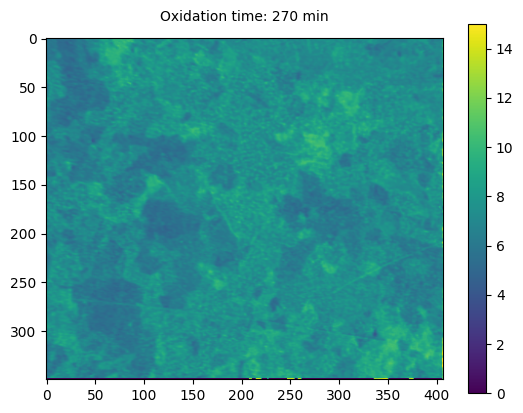

In [38]:

plt.rcParams['animation.ffmpeg_path'] ='C:\\ffmpeg\\bin\\ffmpeg.exe'

data_list = [(image_0min_path,0),(image_30min_path,30),(image_60min_path,60),(image_90min_path,90),
            (image_150min_path,150),(image_180min_path,180),(image_270min_path,270)]

def thickness_movie(data_list : list,max_thickness : int or float= None,
                    saveas : str = None):
    fig, ax = plt.subplots()
    im_list = [[ImageData(path,time).return_image(ax) ,    ax.text(0.5, 1.05, 
                "Oxidation time: {} min".format(time),
                # bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 5},
                transform=ax.transAxes, ha="center")] for path,time in data_list]
    # im_list = []
    # for path,time in data_list:
    #     im = ImageData(path,time).return_image(ax)
    #     title = "Oxidation time: {} min".format(time)
    #     im_list.append([im,title])
    if type(max_thickness) == float or type(max_thickness) == int: 
        for im in im_list:
            im[0].set_clim(0,max_thickness)

    ani = animation.ArtistAnimation(fig, im_list, interval=1000, blit=True,
                                    repeat_delay=1000)

    plt.colorbar(im_list[-1][0])

    if type(saveas) == str:
        writer = animation.FFMpegWriter(
            fps=1, metadata=dict(artist='Larry Brazel'), bitrate=1800)
    
        ani.save(saveas, writer=writer)

thickness_movie(data_list,max_thickness=15,saveas='test.mp4')

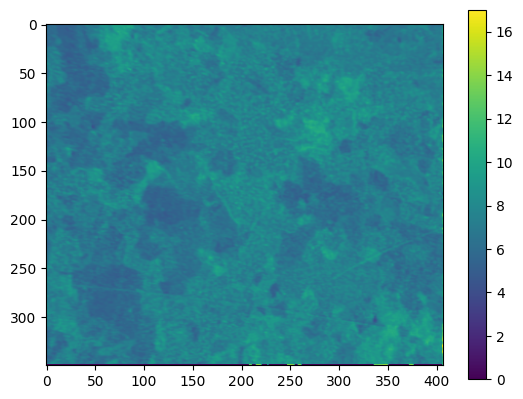

In [ ]:

plt.rcParams['animation.ffmpeg_path'] ='C:\\ffmpeg\\bin\\ffmpeg.exe'

data_list = [(image_0min_path,0),(image_30min_path,30),(image_60min_path,60),(image_90min_path,90),
            (image_150min_path,150),(image_180min_path,180),(image_270min_path,270)]


fig, ax = plt.subplots()
im_list = [[ImageData(path,time).return_image(ax)] for path,time in data_list]
im[0].set_clim(0,15)

ani = animation.ArtistAnimation(fig, im_list, interval=1000, blit=True,
                                repeat_delay=1000)

plt.colorbar(im_list[-1][0])




writer = animation.FFMpegWriter(
    fps=1, metadata=dict(artist='Larry Brazel'), bitrate=1800)

ani.save('test2.mp4', writer=writer)




In [52]:
# function to generate list of paths in to 
# Accurion data png given a folder which contains them 
def generate_data_paths(folder_path : str):
    walk_list = os.listdir(folder_path) # returns all items in folder at folder_path
    accurion_path_list = []
    for item in walk_list:
        # checks if the last characters match those of the Accurion fitted data files
        if item[-6:] == "03.png":
            # uses regex to find the instance of JUST numbers enclosed in two underscores
            match_obj = re.findall("_[0-9]+_",item)
            match_str = match_obj[0] # gets the string of the match
            # print(match_str)
            time = int(match_str[1:-1]) #removes _ and converts to int

            accurion_path_list.append((os.path.join(folder_path,item),time))
    
    #sorts list based off time

    # sorts the list in ascending order of time and returns
    return sorted(accurion_path_list, key = lambda x: x[1])

generate_data_paths(r"C:\Users\lb958\Data\2022_12_06_Cu_in_air_run_01\maps\Thickness_maps\Run_02")

[('C:\\Users\\lb958\\Data\\2022_12_06_Cu_in_air_run_01\\maps\\Thickness_maps\\Run_02\\Cu_tile_100C_air_0_min_003.png',
  0),
 ('C:\\Users\\lb958\\Data\\2022_12_06_Cu_in_air_run_01\\maps\\Thickness_maps\\Run_02\\Cu_tile_100C_air_30_min_003.png',
  30),
 ('C:\\Users\\lb958\\Data\\2022_12_06_Cu_in_air_run_01\\maps\\Thickness_maps\\Run_02\\Cu_tile_100C_air_60_min_003.png',
  60),
 ('C:\\Users\\lb958\\Data\\2022_12_06_Cu_in_air_run_01\\maps\\Thickness_maps\\Run_02\\Cu_tile_100C_air_90_min_003.png',
  90),
 ('C:\\Users\\lb958\\Data\\2022_12_06_Cu_in_air_run_01\\maps\\Thickness_maps\\Run_02\\Cu_tile_100C_air_150_min_003.png',
  150),
 ('C:\\Users\\lb958\\Data\\2022_12_06_Cu_in_air_run_01\\maps\\Thickness_maps\\Run_02\\Cu_tile_100C_air_180_min_003.png',
  180),
 ('C:\\Users\\lb958\\Data\\2022_12_06_Cu_in_air_run_01\\maps\\Thickness_maps\\Run_02\\Cu_tile_100C_air_270_min_003.png',
  270)]

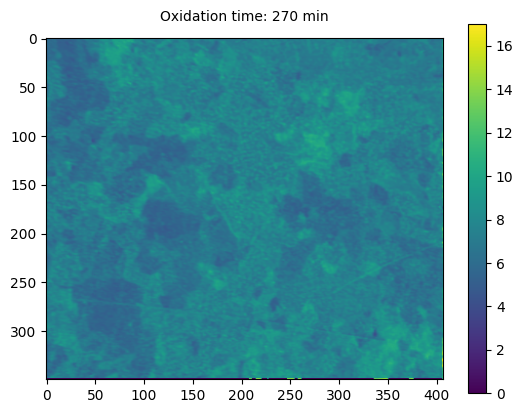

In [53]:
data_list = generate_data_paths(r"C:\Users\lb958\Data\2022_12_06_Cu_in_air_run_01\maps\Thickness_maps\Run_02")
thickness_movie(data_list=data_list,saveas = 'test3.mp4')

In [48]:
student_tuples = [

    ('john', 'A', 15),

    ('jane', 'B', 12),

    ('dave', 'B', 10),

]

sorted(student_tuples, key=lambda student: student[2])

[('dave', 'B', 10), ('jane', 'B', 12), ('john', 'A', 15)]